<a href="https://colab.research.google.com/github/arssite/Animemangatoon.com/blob/main/Task_1_script_that_classifies_descriptions_into_categories_using_Python_and_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Internship Assignment – Animemangatoon.com

## Task 1
The objective of this task is to create a content classifier that can categorize webtoon descriptions into predefined categories (e.g., romance, action, fantasy) using Python and the scikit-learn library. The classifier will be built using a simple dataset extracted from the web, and it will utilize a Decision Tree model for classification. The classifier will also provide visualizations of the classification report and confusion matrix to evaluate its performance.

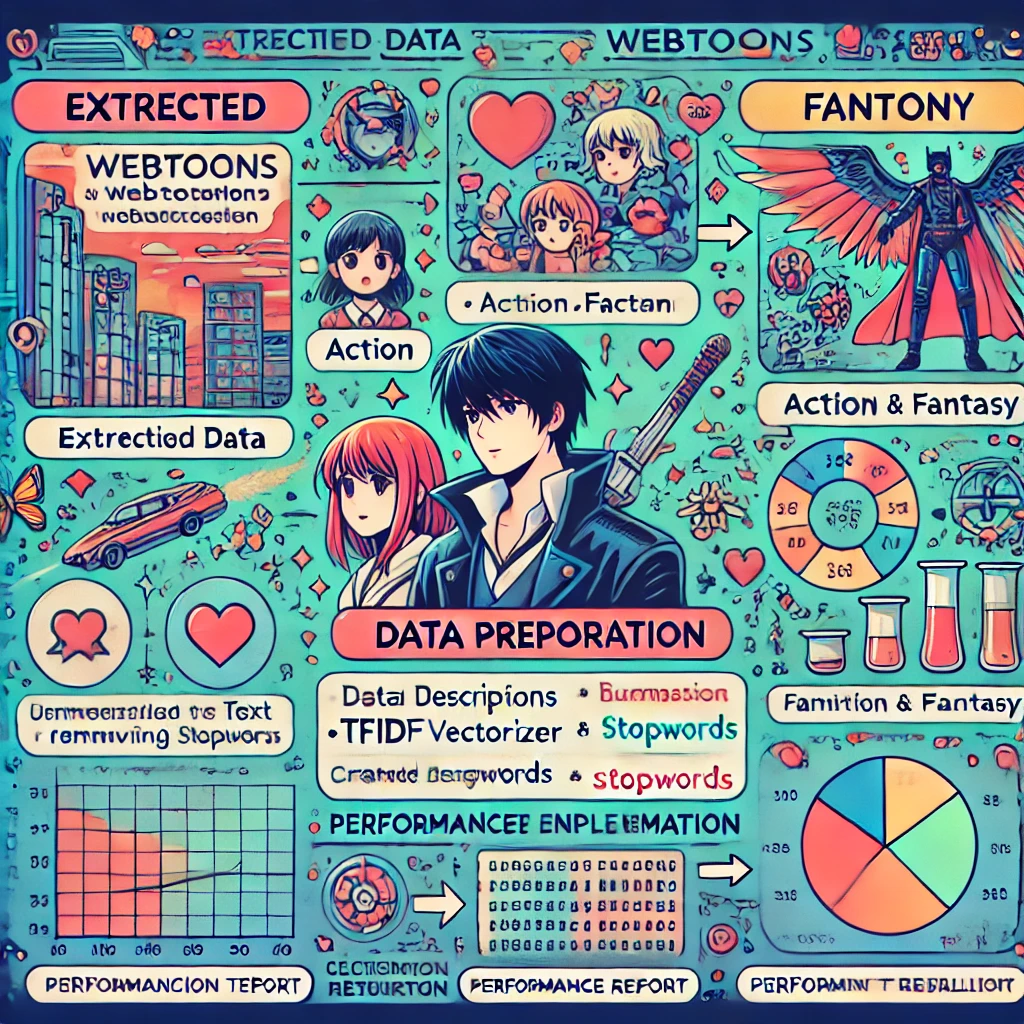

# Solution

**Extracted Data:** The solution began by extracting webtoon descriptions from the provided URL using the BeautifulSoup library to scrape the relevant content.

________________________________________________________________________________


**Data Preparation:**
~ Manually labeled the extracted descriptions into predefined categories (e.g., romance, action, fantasy).
~ Preprocessed the text by removing punctuation and stopwords to clean the data before classification.

________________________________________________________________________________
**Classifier Implementation:**

~ Utilized the TfidfVectorizer from scikit-learn to convert the text descriptions into numerical format.

~ Split the data into training and test sets and trained a Decision Tree Classifier on the dataset.
________________________________________________________________________________
**Performance Evaluation:**

~ Generated a classification report and visualized it using a heatmap.

~ Created a confusion matrix to understand the model's performance further.
________________________________________________________________________________
**User Input Functionality:**

Implemented a function to allow users to input their own URL and webtoon description, classify it, and visualize the results.

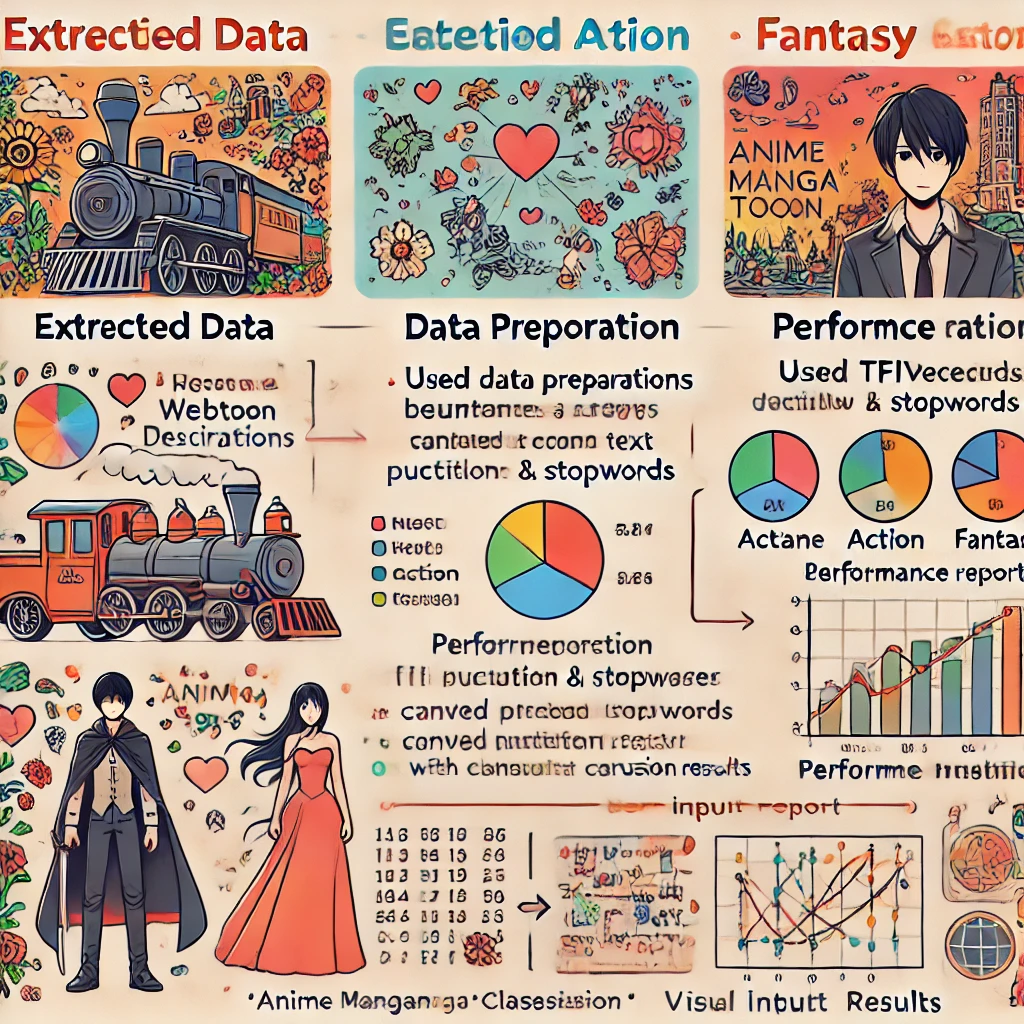

# Importing Required Libaries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Extract webtoon descriptions from the URL
Assuming descriptions are in paragraph tags

Filter out irrelevant short text

In [9]:
def extract_descriptions(url):
    response=requests.get(url)
    soup=BeautifulSoup(response.content, 'html.parser')
    desc=[]
    for i in soup.find_all('p'):
        text = i.get_text(strip=True)
        if text and len(text) > 50:
            desc.append(text)

    return desc

# Assign categories manually for now (can be extended with NLP classification later)
Manually labeling descriptions (for simplicity)

Use only as many as we have labels for

In [11]:
def label_descriptions(descriptions):
    categories = ['romance', 'fantasy', 'romance', 'action', 'romance', 'action','fantasy', 'action', 'romance', 'action']
    return pd.DataFrame({'description': descriptions[:len(categories)],'category': categories})

# Preprocess Data
Remove punctuation, convert to lower case, and remove stopwords

In [13]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

# Build and train classifier
Vectorize the text data

Split the data into training and test sets

Train the classifier (Decision Tree)

Predict categories on test data

Show classification results

Visualization of classification report

Plot a heatmap of the classification report

 Confusion matrix visualization

In [15]:
def build_classifier(df):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(df['description'])
    X_train, X_test, y_train, y_test = train_test_split(X, df['category'], test_size=0.3, random_state=42)
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    report = classification_report(y_test, y_pred, target_names=['romance','fantasy', 'action'], output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', linewidths=0.5)
    plt.title('Classification Report Heatmap')
    plt.show()
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['romance', 'fantasy', 'action'],yticklabels=['romance', 'fantasy','action'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    return classifier, vectorizer

# Test the classifier with a new description

In [16]:
def test_classifier(classifier, vectorizer, new_description):
    new_description_processed = preprocess_text(new_description)
    new_description_transformed = vectorizer.transform([new_description_processed])
    prediction = classifier.predict(new_description_transformed)
    print(f'Predicted category for the new description: {prediction[0]}')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Classification Report:
               precision    recall  f1-score   support

      action       0.00      0.00      0.00         1
     fantasy       0.00      0.00      0.00         1
     romance       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



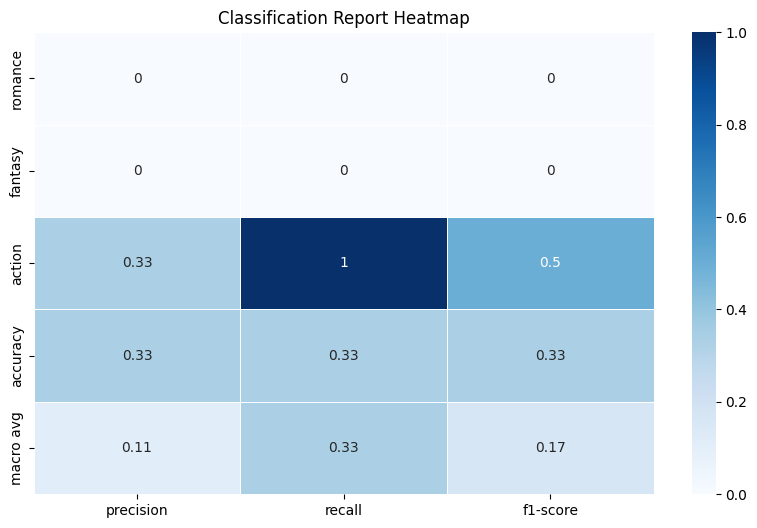

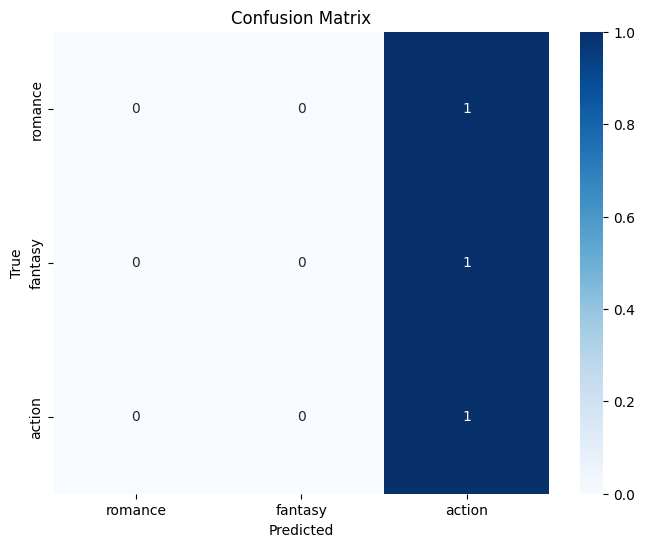

Predicted category for the new description: romance


In [17]:

url = "https://animemangatoon.com/top-anime-and-k-drama-like-true-beauty/"# URL of the article
descriptions = extract_descriptions(url)#Extract descriptions from the URL
df = label_descriptions(descriptions)#Label descriptions
df['description'] = df['description'].apply(preprocess_text)#Preprocess the descriptions
classifier, vectorizer = build_classifier(df)#Build and train the classifier
new_description = "A young girl discovers she has magical powers and must fight evil."#Test the classifier with a new description
test_classifier(classifier, vectorizer, new_description)

Enter Url:  https://animemangatoon.com/top-anime-and-k-drama-like-true-beauty/
enter Description:   girl discovers she has magical powers


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Classification Report:
               precision    recall  f1-score   support

      action       0.00      0.00      0.00         1
     fantasy       1.00      1.00      1.00         1
     romance       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3



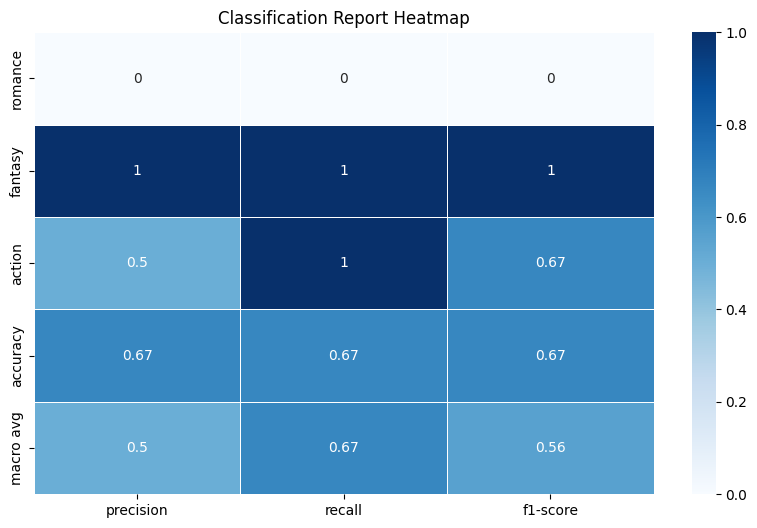

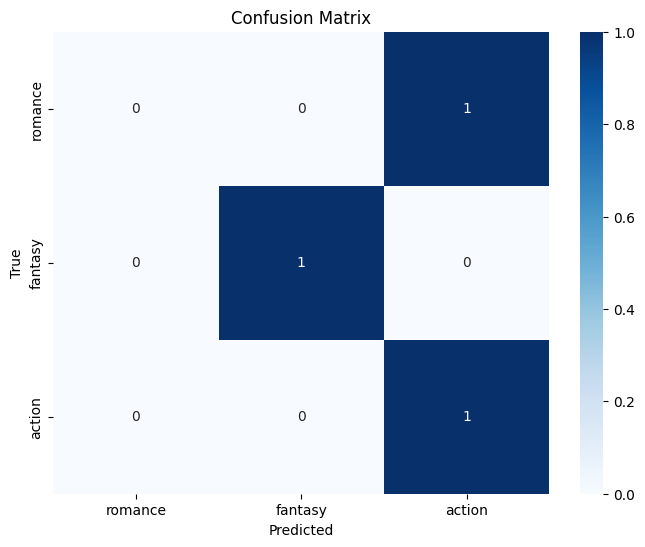

Predicted category for the new description: romance


In [8]:
def InputFromUser(url=input("Enter Url:  "),des=input("enter Description:   ")):
  url=url
  descriptions = extract_descriptions(url)
  df = label_descriptions(descriptions)
  df['description'] = df['description'].apply(preprocess_text)
  classifier, vectorizer = build_classifier(df)
  new_description = des
  return test_classifier(classifier, vectorizer, new_description)
InputFromUser()